# Bài colab 01: sklearn hand-writent digits recongnition

Thành viên nhóm:
- Lê Trần Trọng Khiêm - 19521689
- Trần Tiến Hưng - 19521587
- Lê Đặng Đăng Huy - 19521612

Yêu cầu code: tạo một notebook colab với các đoạn code và chú thích cần thiết để thực hiện công việc sau:
 - Train model cho bài toán hand-written digits recognition theo example của sklearn: https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py
 - Truy cập webcam của máy tính từ colab.
 - Chụp ảnh một tờ giấy đang được giơ ra trước webcam
 - Nhận dạng xem chữ số đang viết trên tờ giấy là số mấy.

Yêu cầu phân tích: Thông qua thực nghiệm chạy thử nhiều lần trả lời các câu hỏi sau

 - Kết quả chạy thực tế với webcam của laptop và giấy viết tay của các bạn có tốt không?
 - Ủa mà nhìn vào đâu để kết luận là tốt hay không?
 - Nếu không tốt thì lý do tại sao?
 - Nếu tốt thì tiếp theo có thể dùng model digits recognition này vào các bài toán phức tạp hơn như nhận dạng biển số nhà không?


# Import libraries

In [ ]:
import matplotlib.pyplot as plt

from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

# Load dataset and take a quick look

In [ ]:
# Load dataset từ sklearn.datasets
digits = datasets.load_digits()
# Xem một số thông tin về dataset digits
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [ ]:
print(f'Images shape: {digits.images.shape}')
print(f'Image as matrix:\n', digits.images[1])

Images shape: (1797, 8, 8)
Image as matrix:
 [[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]


Có thể tóm tắt lại như sau: Có 10 class từ 0 đến 9 là các số từ 0 đến 9. Dataset có 1797 ảnh 8x8, mỗi pixel là một giá trị từ 0 đến 15

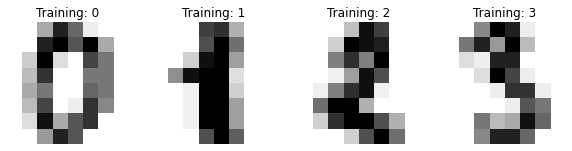

In [ ]:
# Xem một số ảnh trong dataset
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

Do ảnh có độ phân giải thấp nên hình hơi nát

# Preprocessing, train and predict

In [ ]:
# Lấy số lượng hình ảnh trong dataset
n_samples = len(digits.images)

# Chuyển ảnh từ ma trận (8x8) về mảng 1 chiều - làm phẳng
print(f'Image shape: {digits.images.shape}')
data = digits.images.reshape((n_samples, -1))
print(f'Image after reshape: {data.shape}')

# Tạo model SupportVectorClassification, mặc định kernel rbf
clf = svm.SVC(gamma=0.001)

# Chia dữ liệu thành 2 tập, 1 tập train và 1 tập test, số ảnh mỗi tập bằng nhau
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Xem qua shape của tập train và test
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_test: {y_test.shape}')

# Huấn luyện mô hình trên tập train
clf.fit(X_train, y_train)

# Dự đoán giá trị trong tập test
predicted = clf.predict(X_test)

# Nhìn qua kết quả dự đoán
print(f'Shape of predicted: {predicted.shape}')
print(predicted[:20])

Image shape: (1797, 8, 8)
Image after reshape: (1797, 64)
Shape of X_train: (898, 64)
Shape of y_train: (898,)
Shape of X_test: (899, 64)
Shape of y_test: (899,)
Shape of predicted: (899,)
[8 8 4 9 0 8 9 8 1 2 3 4 5 6 7 8 9 0 1 2]


Có thể dễ dàng thấy ứng với mỗi ảnh trong X_test, sẽ có một nhãn tương ứng được dự đoán từ 0 đến 9

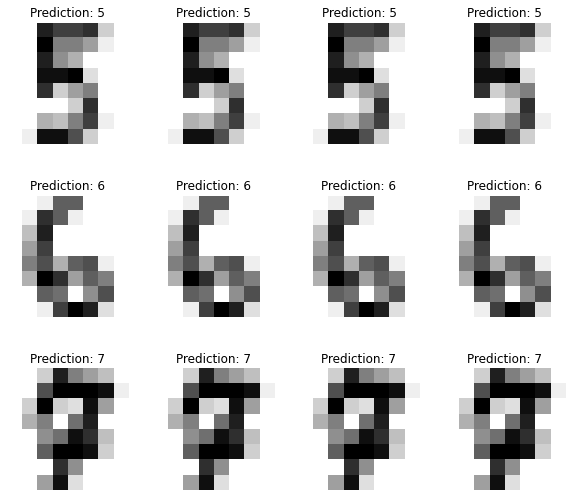

In [ ]:
# Xem qua kết quả dự đoán kèm theo ảnh
_, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 9))
for axs, image, prediction in zip(axes, X_test[12:], predicted[12:]):
    for ax in axs:
      ax.set_axis_off()
      image = image.reshape(8, 8)
      ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
      ax.set_title(f'Prediction: {prediction}')

Nhìn vào kết quả có thể thấy mô hình dự đoán trên tập test khá chính xác

# Evaluate

In [ ]:
# Đánh giá kết quả dựa trên label thực tế và label dự đoán được
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted a

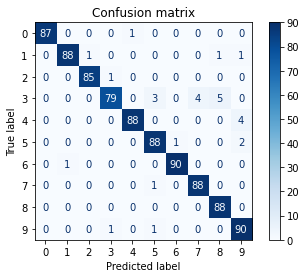

In [ ]:
from sklearn.metrics import plot_confusion_matrix
disp  = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion matrix')
plt.show()

Nhìn vào kết quả đánh giá có thể thấy được mô hình SVC thể hiện rất tốt trên tập test, các điểm precision, recall, f1-score và accuracy hầu như đều trên 9.0. Giờ hãy xem nó thể hiện như thế nào trên bộ ảnh chụp từ thực tế.

# Capture image from camera

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
my_data = []

In [ ]:
import os
from IPython.display import Image

# Tạo thư mục chứa ảnh chụp
DIR = 'images'
if not os.path.exists(DIR):
    os.makedirs(DIR)

# Lấy đường dẫn ảnh
def image_name(n):
  return f'{DIR}/image-{n}.jpg'

try:
  # Chụp nhiều ảnh thì tự động tăng i lên tránh ghi đè ảnh cũ
  i = 0
  while os.path.isfile(image_name(i)):
    i += 1
  filename = take_photo(image_name(i))
  print('Saved to {}'.format(filename))
  
  # Hiện cái ảnh mới vừa chụp xong
  display(Image(filename))

  # Gán label cho ảnh vừa chụp
  while True:
    label = int(input("Please label your image: "))
    if label in range(0, 10):
      break

  my_data.append([label, filename])

except Exception as err:
  # Lỗi nếu như người dùng ko có webcam hoặc là người dùng từ chối
  # cấp quyền truy cập camera
  print(str(err))

# Load image captured and predict

In [ ]:
import numpy as np
import cv2

In [ ]:
# Chuyển list sang numpy array
data = np.array(my_data)
data.shape

(19, 2)

In [ ]:
# Tách label, path riêng ra
labels = data[:, 0]
paths = data[:, 1]

In [ ]:
images_to_show = []
for path in paths:
  img = cv2.imread(path)

  images_to_show.append(img)

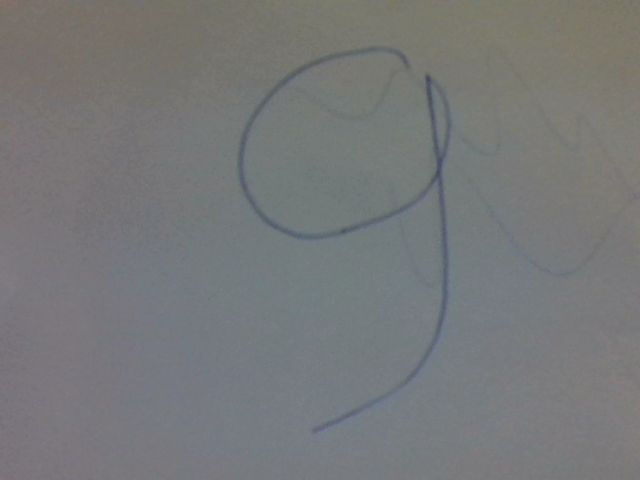

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(images_to_show[0])

In [ ]:
images = []
for path in paths:
  img = cv2.imread(path)

  # Đưa ảnh về kích thước 8x8
  img = cv2.resize(img, (8, 8), interpolation = cv2.INTER_AREA)

  # Chuyển ảnh đầu vào RGB sang gray scale
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Do ảnh dùng để huấn luyện mô hình trong khoảng
  # 0 đến 1 nên ta phải đưa ảnh về 0 1 để mô hình có thể dự đoán
  img = img / 16
  # Vì ảnh huấn luyện có nền đen (giá trị gần 0) và số trắng
  # nên ta cũng phải đưa ảnh dự đoán về đúng như vậy
  img = 16 - img

  images.append(img)

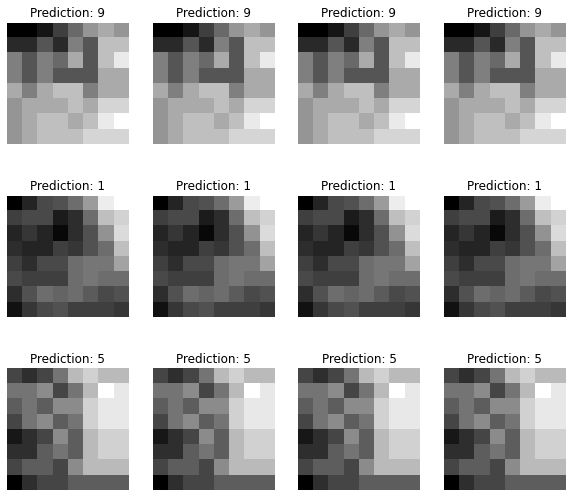

In [ ]:
# Ảnh đã load
_, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 9))
for axs, image, prediction in zip(axes, images[:], labels[:]):
    for ax in axs:
      ax.set_axis_off()
      # image = image.reshape(8, 8)
      ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
      ax.set_title(f'Prediction: {prediction}')

In [ ]:
# Trải phẳng ảnh đề phù hợp với input của model
images = np.array([im.flatten() for im in images])

In [ ]:
images.shape

(19, 64)

In [ ]:
y_pred = clf.predict(images)

In [ ]:
y_pred

array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 2, 5, 9, 9, 9, 9, 9, 9, 9])

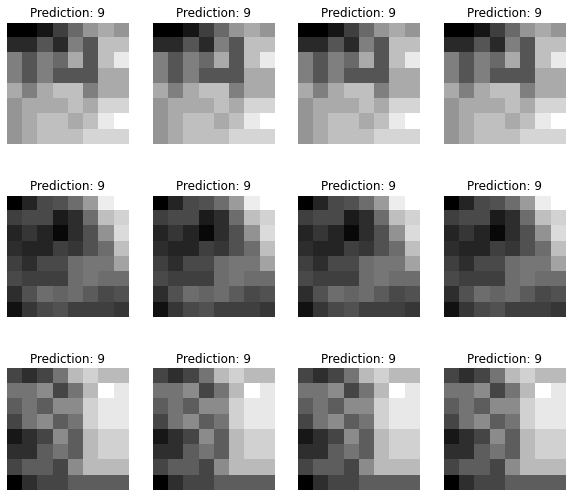

In [ ]:
# Ảnh đã load
_, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 9))
for axs, image, prediction in zip(axes, images[:], y_pred[:]):
    for ax in axs:
      ax.set_axis_off()
      image = image.reshape(8, 8)
      ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
      ax.set_title(f'Prediction: {prediction}')

Đến đây thì có thể thấy mô hình khi ứng dụng vào thực tế thì cho kết quả khá tệ.

Nguyên nhân của việc dự đoán không chính xác này là do dữ liệu huấn luyện là ảnh có kích thước nhỏ, các số nằm vừa trong ảnh. Tuy nhiên ảnh chụp lại khác, ảnh chụp số có thể nằm nhỏ hơn đâu đó trong ảnh, nét chữ mảnh hơn, có bìa sách... do đó khi resize về kích thước 8x8, ảnh của chúng ta đã bị mất thông tin.

# Test good cases

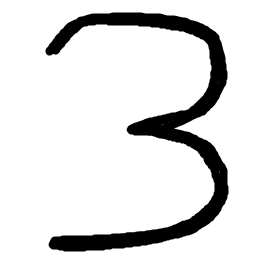

Predicted label: 3


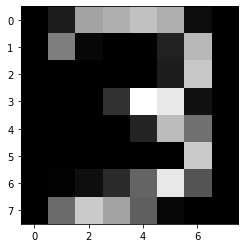

In [ ]:
img = cv2.imread('images/Untitled.png')
cv2_imshow(img)
img = cv2.resize(img, (8, 8), interpolation = cv2.INTER_AREA)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
img = 16- (img / 16)
print('Predicted label:', clf.predict([img.flatten()])[0])

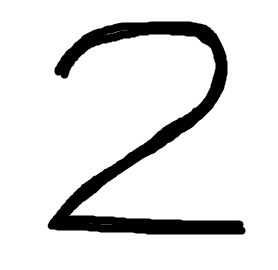

Predicted label: 2


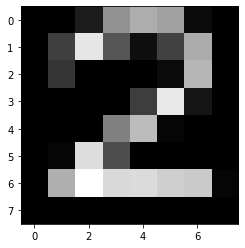

In [ ]:
img = cv2.imread('images/Untitled1.png')
cv2_imshow(img)
img = cv2.resize(img, (8, 8), interpolation = cv2.INTER_AREA)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
img = 16- (img / 16)
print('Predicted label:', clf.predict([img.flatten()])[0])

Nhìn vào hai ảnh trên có thể dễ dàng thấy được, số được viết vừa với ảnh và không có nhiễu do background thì mô hình dự đoán khá tốt

# Kết luận

Kết quả chạy thực tế với webcam của laptop và giấy viết tay của các bạn có tốt không?

Kết quả chạy thực tế từ webcam của laptop và giấy viết tay chưa tốt.

Ủa mà nhìn vào đâu để kết luận là tốt hay không?

Nhìn vào kết quả mà mô hình dự đoán ra so với thực tế

Nếu không tốt thì lý do vì sao?

Mô hình này tuy dự đoán tốt trên tập test, tuy nhiên trên dữ liệu ảnh thực tế thò lại rất tệ. Nguyên nhân chính là do ảnh chụp thực tế không hoàn hảo được như tập dữ liệu huấn luyện và tập test. Ảnh chụp thực tế có thể bị méo, bị chênh sáng, background ảnh bị nhiễu, không được chụp trên bìa trắng, chữ không nổi bật, nét chữ nhạt...

Nếu tốt thì tiếp theo có thể dùng model digits recognition này vào các bài toán phức tạp hơn như nhận dạng biển số nhà không?

Mô hình này không thể áp dụng vào bài toán nhận diện số nhà được.